In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
I_0 = 5
N = 10
Ris = 0.5
Rsi = 2

In [41]:
def getQMatrix(Rsi, a=0.5, N=10, Ris=0.5):
    # Create Q matrix
    Q = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        if i != N:
            Q[i, i + 1] = Ris * (N - i) # infective becomes a susceptible again
        if i != 0:
            Q[i, i - 1] = Rsi * i * (N - i) + a # susceptible becomes an infective
        Q[i, i] = - np.sum(Q[i, :])
    return Q

Q = getQMatrix(Rsi, a=0.5, Ris=0.5)

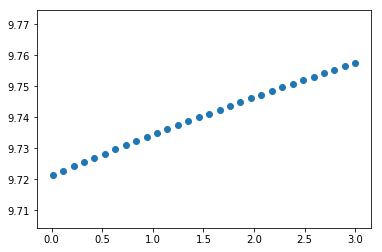

In [74]:
As = np.linspace(0.01, 3, num=30)

infection_rate = []

for A in As:
    Q = getQMatrix(Rsi, a=A, Ris=0.5)
    Qt = np.transpose(Q.copy())
    Qt[-1, :] = np.ones(Q[-1].shape)
    b = np.zeros(Qt.shape[0])
    b[-1] = 1
    pi = np.linalg.solve(Qt, b)

    pi_t = pi
    pi = np.transpose(pi[:, np.newaxis])
    
    assert np.allclose(1, sum(pi[0]))
    assert np.allclose(np.matmul(pi, Q), np.zeros(pi.shape))
    
    infection_rate.append(sum((N - index) * p for index, p in enumerate(pi[0], 0)))

plt.figure()
plt.scatter(As, infection_rate)